In [676]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [677]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [678]:
df=pd.read_excel('Datasets/products.xlsx')

In [679]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [680]:
df

,id,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
0,1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.8,Y,Noida,OneYr
1,2,mobile,80k,logitech K120,none,0,1,NaN,0,pune,NaN
2,3,headphone,100$,classmate,flat ten,1,0,4.5,1,Bangalore,1 year
3,4,accessories,"rs1,299",dell-d11,NaN,1,0,3,Y,Delhi,OneYr
4,5,books,899rs/-,classmate,NaN,0,0,4.5,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...,...
995,996,keyboard,80k,Samsung S-12,none,1,1,four,YES,pune,OneYr
996,997,tablet,80k,boAT-B19,upto 30%,1,1,five,yes,Hyderabad,12 months
997,998,tablet,100$,lenovo L11,none,0,0,3.8,YES,Bangalore,12 months
998,999,books,500rs+50$,classmate,flat ten,0,1,3,Y,mumbai,NaN


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  893 non-null    object
 4   discount     881 non-null    object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     683 non-null    object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [682]:
df.isnull().sum()

id               0
product          0
price            0
brand_model    107
discount       119
Amazon           0
Flipkart         0
rating         132
stock            0
seller_city      0
warranty       317
dtype: int64

In [683]:
df.duplicated().any()  
df.duplicated(subset='id').any()

False

In [684]:
df.columns

Index(['id', 'product', 'price', 'brand_model', 'discount', 'Amazon',
       'Flipkart', 'rating', 'stock', 'seller_city', 'warranty'],
      dtype='object')

In [685]:
df.columns[[3,4,10]]

Index(['brand_model', 'discount', 'warranty'], dtype='object')

In [686]:
for i in df.columns[[3,4,10]]:
    df[i]=df[i].fillna('Unknown')

# 1st method


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  1000 non-null   object
 4   discount     1000 non-null   object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [688]:
# df[df.columns[[3,4,10]]].fillna('Unknown')

# 2nd method

In [689]:
# df[['brand_model', 'discount', 'warranty']].fillna('Unknown')

In [690]:
df['rating'].unique()

array([3.8, nan, 4.5, 3, 'five', 'four', 5, 4.2], dtype=object)

In [691]:
df['rating']=df['rating'].replace({'five':5,'four':4}).astype(float).round(1)

In [692]:
df['rating'].unique()

array([3.8, nan, 4.5, 3. , 5. , 4. , 4.2])

<Axes: xlabel='rating'>

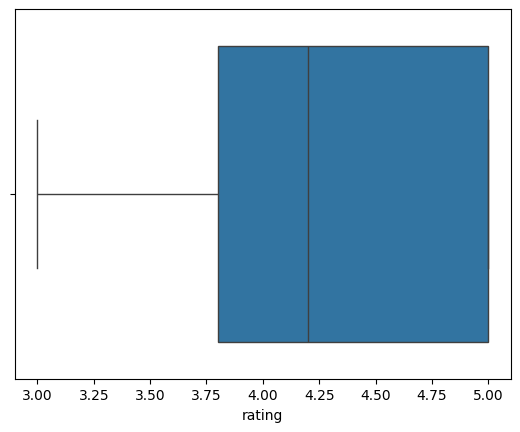

In [693]:
sns.boxplot(df,x='rating') #check for outlier if no outlier mean if outlier is there median and for cateigoral we use mode

In [694]:
df['rating']=df['rating'].fillna(df['rating'].mean()).round(1)

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   product      1000 non-null   object 
 2   price        1000 non-null   object 
 3   brand_model  1000 non-null   object 
 4   discount     1000 non-null   object 
 5   Amazon       1000 non-null   int64  
 6   Flipkart     1000 non-null   int64  
 7   rating       1000 non-null   float64
 8   stock        1000 non-null   object 
 9   seller_city  1000 non-null   object 
 10  warranty     1000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 86.1+ KB


In [696]:
df=df.set_index('id')

In [697]:
df

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.8,Y,Noida,OneYr
2,mobile,80k,logitech K120,none,0,1,4.2,0,pune,Unknown
3,headphone,100$,classmate,flat ten,1,0,4.5,1,Bangalore,1 year
4,accessories,"rs1,299",dell-d11,Unknown,1,0,3.0,Y,Delhi,OneYr
5,books,899rs/-,classmate,Unknown,0,0,4.5,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...
996,keyboard,80k,Samsung S-12,none,1,1,4.0,YES,pune,OneYr
997,tablet,80k,boAT-B19,upto 30%,1,1,5.0,yes,Hyderabad,12 months
998,tablet,100$,lenovo L11,none,0,0,3.8,YES,Bangalore,12 months


In [698]:
df.columns[[0,1,2,3,7]]

Index(['product', 'price', 'brand_model', 'discount', 'stock'], dtype='object')

In [699]:
for col in  df.columns[[0,1,2,3,7]]:
    print('-'*10,col,'-'*50)
    print(df[col].unique(),end='\n\n')
 
 

---------- product --------------------------------------------------
['keyboard' 'mobile' 'headphone' 'accessories' 'books' 'earphones'
 'laptop' 'tablet']

---------- price --------------------------------------------------
['Rs.70000' '80k' '100$' 'rs1,299' '899rs/-' '50$' 'USD 200' 15000
 '500rs+50$' 'one thousand rs' '15000rs + tax' 399 '50$+500rs' '100rs']

---------- brand_model --------------------------------------------------
['dell-d11' 'logitech K120' 'classmate' 'acer Aspire 5' 'vivo,V1.'
 'Unknown' 'apple-13' 'lenovo tab M10' 'samsung S12' 'boAT-B19' 'HP-H01'
 'samsung,s12' 'JBL_450BT' 'Mi-Cable' 'Samsung S-12' 'boAT-B11'
 'lenovo L11' 'boat b11' 'flat 10%' 'flat 20%' 'flat ten' 'upto 30%'
 'flat 15%']

---------- discount --------------------------------------------------
['flat ten' 'none' 'Unknown' 'flat 10%' 'upto 30%' '10 percent' 'flat 20%'
 0.2 'flat 15%' '0.2' 'HP-H01' 'JBL_450BT' 'samsung s12' 'samsung,s12']

---------- stock -------------------------------------

In [700]:
df['product']=df['product'].str.title()

In [701]:
df['stock']=df['stock'].replace({'yes':1,"Y":1,'no':0,'0':0,'1':1,'YES':1,'NO':0})

In [702]:
df.loc[df['discount'].isin(['HP-H01','JBL_450BT','samsung s12','samsung,s12'])]

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
329,Headphone,"rs1,299",flat 10%,HP-H01,0,0,3.0,0,pune,Unknown
330,Headphone,100rs,flat 20%,JBL_450BT,1,0,5.0,1,delhi,12 months
380,Keyboard,one thousand rs,flat ten,samsung s12,1,1,5.0,0,Bangalore,6 months
381,Earphones,50$,upto 30%,"samsung,s12",0,0,4.2,0,BLR,12 months
382,Tablet,Rs.70000,flat 15%,"samsung,s12",1,0,3.8,1,bangalore,1 year


In [703]:
# def dis(row):
#     #scalar data both means not a collection its is primitive data
#     bm=row['brand_model']
#     d=row['discount']
#     if d in ['HP-H01','JBL_450BT','samsung s12','samsung,s12']:
#         return bm
#     else:
#         return d
# def brand(row):
#     #scalar data both means not a collection its is primitive data
#     bm=row['brand_model']
#     d=row['discount']
#     if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
#         return d
#     else:
#         return bm

In [704]:
# df.apply(dis,axis=1).unique()


In [705]:

# df.apply(brand,axis=1).unique()


In [706]:
def swap(row):
    #scalar data both means not a collection its is primitive data
    bm=row['brand_model']
    d=row['discount']
    if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
        return [d,bm]
    else:
        return [bm,d]


In [707]:
brand_dis_col=df.apply(swap,axis=1).astype(str).str.replace('[^A-Za-z0-9 ,%.-]',"",regex=True).str.rsplit(',',expand=True,n=1)

# here we use regualr expression here '^' after this what all we write all will these will exculed
brand_dis_col.head()

,0,1
id,,
1,dell-d11,flat ten
2,logitech K120,none
3,classmate,flat ten
4,dell-d11,Unknown
5,classmate,Unknown


In [708]:
df[['brand_model','discount']]=brand_dis_col

In [709]:
df['brand_model'].unique()

array(['dell-d11', 'logitech K120', 'classmate', 'acer Aspire 5',
       'vivo,V1.', 'Unknown', 'apple-13', 'lenovo tab M10', 'samsung S12',
       'boAT-B19', 'HP-H01', 'samsung,s12', 'JBL450BT', 'Mi-Cable',
       'Samsung S-12', 'boAT-B11', 'lenovo L11', 'boat b11',
       'samsung s12'], dtype=object)

In [710]:
df['discount'].unique()

array([' flat ten', ' none', ' Unknown', ' flat 10%', ' upto 30%',
       ' 10 percent', ' flat 20%', ' 0.2', ' flat 15%'], dtype=object)

In [711]:
#brand_dis_col=df.apply(swap,axis=1)  #o/p will in series of list
#brand_dis_col=brand_dis_col.astype(str)  #explict type converision
# --------------------------------------------------------------------------
#brand_dis_col=brand_dis_col.str.replace('[^A-Za-z0-9 ,.%]','',regex=TRue)
# removes the char which is not in the pattern\
# ==============================================================================

# df[['brand_model','discount']]=brand_dis_col.str.rsplit(','exapnd=True,n=1)
#split using comma and gives list --> expand=true converts the list elemnts to columns

In [712]:
df['brand_model'].unique()


array(['dell-d11', 'logitech K120', 'classmate', 'acer Aspire 5',
       'vivo,V1.', 'Unknown', 'apple-13', 'lenovo tab M10', 'samsung S12',
       'boAT-B19', 'HP-H01', 'samsung,s12', 'JBL450BT', 'Mi-Cable',
       'Samsung S-12', 'boAT-B11', 'lenovo L11', 'boat b11',
       'samsung s12'], dtype=object)

In [713]:
df['brand_model']=df['brand_model'].replace({'Samsung S-12':'Samsung S12'})


In [714]:
df['brand_model']=df['brand_model'].str.replace(' |,','-',regex=True,n=1)

In [715]:
df['brand_model'].unique()

array(['dell-d11', 'logitech-K120', 'classmate', 'acer-Aspire 5',
       'vivo-V1.', 'Unknown', 'apple-13', 'lenovo-tab M10', 'samsung-S12',
       'boAT-B19', 'HP-H01', 'samsung-s12', 'JBL450BT', 'Mi-Cable',
       'Samsung-S12', 'boAT-B11', 'lenovo-L11', 'boat-b11'], dtype=object)

In [716]:
df[['brand','model']]=df['brand_model'].str.split('-',expand=True).fillna("no model")

In [717]:
df=df.drop(columns='brand_model')

In [718]:
df

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
1,Keyboard,Rs.70000,flat ten,0,1,3.8,1,Noida,OneYr,dell,d11
2,Mobile,80k,none,0,1,4.2,0,pune,Unknown,logitech,K120
3,Headphone,100$,flat ten,1,0,4.5,1,Bangalore,1 year,classmate,no model
4,Accessories,"rs1,299",Unknown,1,0,3.0,1,Delhi,OneYr,dell,d11
5,Books,899rs/-,Unknown,0,0,4.5,1,Noida,OneYr,classmate,no model
...,...,...,...,...,...,...,...,...,...,...,...
996,Keyboard,80k,none,1,1,4.0,1,pune,OneYr,Samsung,S12
997,Tablet,80k,upto 30%,1,1,5.0,1,Hyderabad,12 months,boAT,B19
998,Tablet,100$,none,0,0,3.8,1,Bangalore,12 months,lenovo,L11


In [719]:
df['discount'].unique()

array([' flat ten', ' none', ' Unknown', ' flat 10%', ' upto 30%',
       ' 10 percent', ' flat 20%', ' 0.2', ' flat 15%'], dtype=object)

In [720]:
df['discount']=df['discount'].str.strip() #removes the spaces 

In [721]:
df['discount'].unique()

array(['flat ten', 'none', 'Unknown', 'flat 10%', 'upto 30%',
       '10 percent', 'flat 20%', '0.2', 'flat 15%'], dtype=object)

In [722]:
df['discount']=df['discount'].str.replace('ten','10%')

In [723]:
df['discount']=df['discount'].str.replace(' percent','%')

In [724]:
df['discount']=df['discount'].replace({'none':'No discount','Unknown':'No discount','0.2':'20%'})

In [725]:
df['discount'].unique()


array(['flat 10%', 'No discount', 'upto 30%', '10%', 'flat 20%', '20%',
       'flat 15%'], dtype=object)

In [726]:
# find the record which does not have flat attribute 

df.loc[~df['discount'].str.contains('flat')]

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
2,Mobile,80k,No discount,0,1,4.2,0,pune,Unknown,logitech,K120
4,Accessories,"rs1,299",No discount,1,0,3.0,1,Delhi,OneYr,dell,d11
5,Books,899rs/-,No discount,0,0,4.5,1,Noida,OneYr,classmate,no model
7,Earphones,Rs.70000,No discount,0,0,4.0,1,pune,1 year,vivo,V1.
8,Laptop,USD 200,No discount,0,1,3.0,1,Bangalore,OneYr,Unknown,no model
...,...,...,...,...,...,...,...,...,...,...,...
994,Laptop,15000,20%,0,1,4.2,0,bangalore,1 year,lenovo,L11
995,Mobile,"rs1,299",No discount,1,0,4.0,0,BLR,6 months,dell,d11
996,Keyboard,80k,No discount,1,1,4.0,1,pune,OneYr,Samsung,S12


In [727]:
dis=df.loc[~df['discount'].str.startswith(('upto','flat','No'),),'discount']
res='flat '+dis
df.loc[~df['discount'].str.startswith(('upto','flat','No'),),'discount']=res

In [728]:
df['discount'].unique()

array(['flat 10%', 'No discount', 'upto 30%', 'flat 20%', 'flat 15%'],
      dtype=object)

In [729]:
df['warranty'].unique()

array(['OneYr', 'Unknown', '1 year', '6 months', '12 months'],
      dtype=object)

In [730]:
df['warranty']=df['warranty'].replace({'OneYr':'12 months','1 year':'12 months'})

In [731]:
for col in ['brand','model']:
    df[col]=df[col].str.title()

In [732]:
df['seller_city'].unique()

array(['Noida', 'pune', 'Bangalore', 'Delhi', 'hyd', 'Mumbai', 'BLR',
       'Pune', 'Hyderabad', 'Chennai', 'delhi', 'bangalore', 'Kolkata',
       'mumbai'], dtype=object)

In [733]:
df['seller_city']=df['seller_city'].str.title()
df['seller_city']=df['seller_city'].replace({'Hyd':'Hyderabad','Blr':'Bangalore'})


In [734]:
df['price'].unique()

array(['Rs.70000', '80k', '100$', 'rs1,299', '899rs/-', '50$', 'USD 200',
       15000, '500rs+50$', 'one thousand rs', '15000rs + tax', 399,
       '50$+500rs', '100rs'], dtype=object)

In [735]:
df['price']=df['price'].astype(str) #in excel we can multiple data types 

In [736]:
df['price']=df['price'].replace({'one thousand rs':'1000'})

In [737]:
df['price'].str.replace('rs|Rs.|/-| tax',"",regex=True).unique()

array(['70000', '80k', '100$', '1,299', '899', '50$', 'USD 200', '15000',
       '500+50$', '1000', '15000 +', '399', '50$+500', '100'],
      dtype=object)

In [738]:
df['price']=df['price'].str.replace('rs|Rs.|/-| tax| |,',"",regex=True).str.strip(' +')


In [739]:
df['price'].unique()

array(['70000', '80k', '100$', '1299', '899', '50$', 'USD200', '15000',
       '500+50$', '1000', '399', '50$+500', '100'], dtype=object)

In [740]:
df['price']=df['price'].str.replace('USD','$',regex=True,case=False)

In [741]:
df['price']=df['price'].str.replace('k','000',regex=True,case=False)


In [742]:
def conv(p):
    dol=90
    if  '+' in  p:
         L=p.split('+')
         if L[0].isdigit():  
            v1=float(L[0])
         elif '$' in L[0]:
            v1=float(L[0].strip('$'))*dol

         if L[1].isdigit():
            v2=float(L[1])
         elif '$' in L[1]:
            v2=float(L[1].strip('$'))*dol
         return v1+v2
    elif '$' in p:
       return float(p.strip('$'))*dol
    else:
        return float(p)





In [743]:
df['price']=df['price'].apply(conv).astype(int)

In [744]:
df['price'].unique()

array([70000, 80000,  9000,  1299,   899,  4500, 18000, 15000,  5000,
        1000,   399,   100])

In [745]:
df

,product,price,discount,Amazon,Flipkart,rating,stock,seller_city,warranty,brand,model
id,,,,,,,,,,,
1,Keyboard,70000,flat 10%,0,1,3.8,1,Noida,12 months,Dell,D11
2,Mobile,80000,No discount,0,1,4.2,0,Pune,Unknown,Logitech,K120
3,Headphone,9000,flat 10%,1,0,4.5,1,Bangalore,12 months,Classmate,No Model
4,Accessories,1299,No discount,1,0,3.0,1,Delhi,12 months,Dell,D11
5,Books,899,No discount,0,0,4.5,1,Noida,12 months,Classmate,No Model
...,...,...,...,...,...,...,...,...,...,...,...
996,Keyboard,80000,No discount,1,1,4.0,1,Pune,12 months,Samsung,S12
997,Tablet,80000,upto 30%,1,1,5.0,1,Hyderabad,12 months,Boat,B19
998,Tablet,9000,No discount,0,0,3.8,1,Bangalore,12 months,Lenovo,L11


In [751]:
df.columns

col=['product', 'price', 'discount', 'rating', 'stock',
       'seller_city', 'warranty', 'brand', 'model']

In [754]:
df1=pd.melt(df,id_vars=col,value_vars=['Amazon','Flipkart'],var_name='shopping app',value_name='availability')

In [755]:
df1=df1.loc[df1['availability']==1].reset_index(drop=True).drop(columns='availability')

In [756]:
df1

,product,price,discount,rating,stock,seller_city,warranty,brand,model,shopping app
0,Headphone,9000,flat 10%,4.5,1,Bangalore,12 months,Classmate,No Model,Amazon
1,Accessories,1299,No discount,3.0,1,Delhi,12 months,Dell,D11,Amazon
2,Accessories,4500,upto 30%,5.0,1,Hyderabad,Unknown,Dell,D11,Amazon
3,Headphone,5000,flat 20%,3.8,1,Mumbai,Unknown,Samsung,S12,Amazon
4,Keyboard,899,flat 20%,3.8,1,Bangalore,12 months,Logitech,K120,Amazon
...,...,...,...,...,...,...,...,...,...,...
1009,Laptop,15000,flat 20%,4.2,0,Bangalore,12 months,Lenovo,L11,Flipkart
1010,Keyboard,80000,No discount,4.0,1,Pune,12 months,Samsung,S12,Flipkart
1011,Tablet,80000,upto 30%,5.0,1,Hyderabad,12 months,Boat,B19,Flipkart
1012,Books,5000,flat 10%,3.0,1,Mumbai,Unknown,Classmate,No Model,Flipkart
